  This is a short example how to load and visualise SILAM air quality data from AWS Public datasets (S3).

In [15]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import boto3
from botocore.handlers import disable_signing
import os
import zarr

First we download the data from S3. Note that zarr is essentially a directory so we need to download each files (keys) from it. 

In [46]:
def download(bucket_name, key, dst_root='/tmp'):
    """ Download zarr directory from S3"""
    resource = boto3.resource('s3')
    resource.meta.client.meta.events.register('choose-signer.s3.*', disable_signing)
    
    bucket = resource.Bucket(bucket_name) 
    for object in bucket.objects.filter(Prefix = key):
        dst = dst_root+'/'+object.key
        if not os.path.exists(os.path.dirname(dst)):
            os.makedirs(os.path.dirname(dst))
        s3.download_file(bucket_name, object.key, dst)

The data in the bucket is open and free but no archive is provided. In order to run this example again, please add some valid key. You may find existing keys by accessing: https://fmi-opendata-silam-surface-zarr.s3-eu-west-1.amazonaws.com/index.html

In [59]:
bucket_name = 'fmi-opendata-silam-surface-zarr'
key = 'global/20190629/silam_glob_v5_6_20190629_CO_d0.zarr'

tmp_dir = '/tmp'
tmp_file = tmp_dir + '/'+key

if not os.path.exists(os.path.dirname(tmp_file)):
    os.makedirs(os.path.dirname(tmp_file))

download(bucket_name, key)

Open the data as xarray and print info:

In [61]:
ds = xr.open_zarr(tmp_file)
print(ds.info())

xarray.Dataset {
dimensions:
	lat = 897 ;
	lon = 1800 ;
	time = 24 ;

variables:
	float32 CO(time, lat, lon) ;
		CO:_ChunkSizes = [1, 1, 200, 200] ;
		CO:cell_methods = hybrid: mean ;
		CO:long_name = Concentration in air CO_gas ;
		CO:mode_distribution_type = GAS_PHASE ;
		CO:mode_name =  ;
		CO:mode_solubility = 0 ;
		CO:molar_mass = 0.0280000            kg/mole ;
		CO:number_of_significant_digits = 2 ;
		CO:silam_amount_unit = mole ;
		CO:substance_name = CO ;
		CO:units = ug/m3 ;
	float32 lat(lat) ;
		lat:_ChunkSizes = 200 ;
		lat:_CoordinateAxisType = Lat ;
		lat:axis = Y ;
		lat:long_name = latitude ;
		lat:standard_name = latitude ;
		lat:units = degrees_north ;
	float32 lon(lon) ;
		lon:_ChunkSizes = 200 ;
		lon:_CoordinateAxisType = Lon ;
		lon:axis = X ;
		lon:long_name = longitude ;
		lon:standard_name = longitude ;
		lon:units = degrees_east ;
	datetime64[ns] time(time) ;
		time:_CoordinateAxisType = Time ;
		time:long_name = Forecast time for ForecastModelRunCollection ;
	

 Plot one time step:

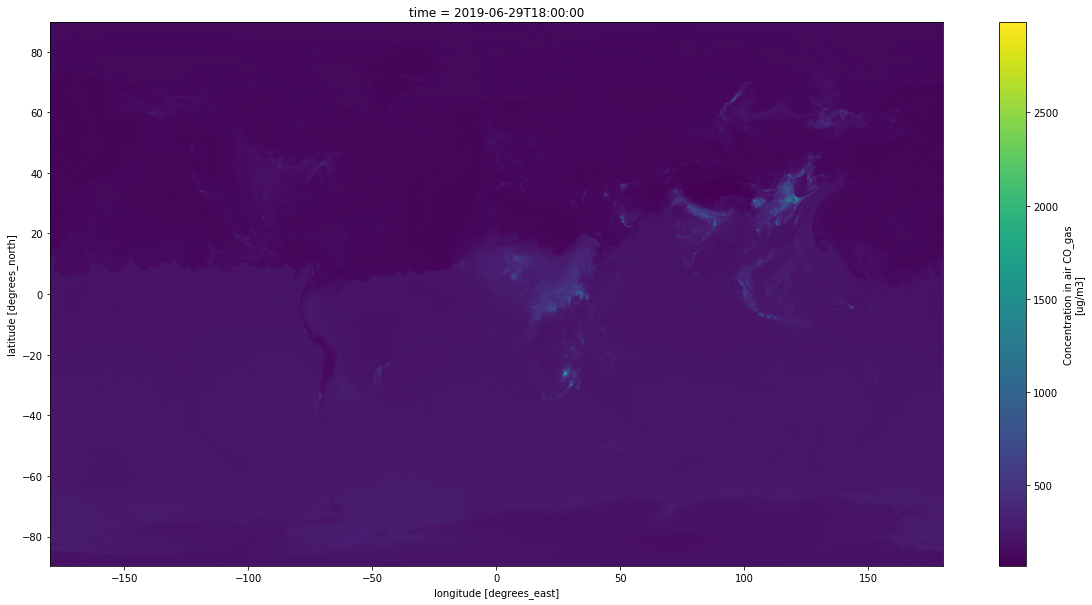

In [70]:
ds['CO'].sel(time='2019-06-29T18:00:00.000000000').plot(figsize=(20,10))

Plot mean over time:

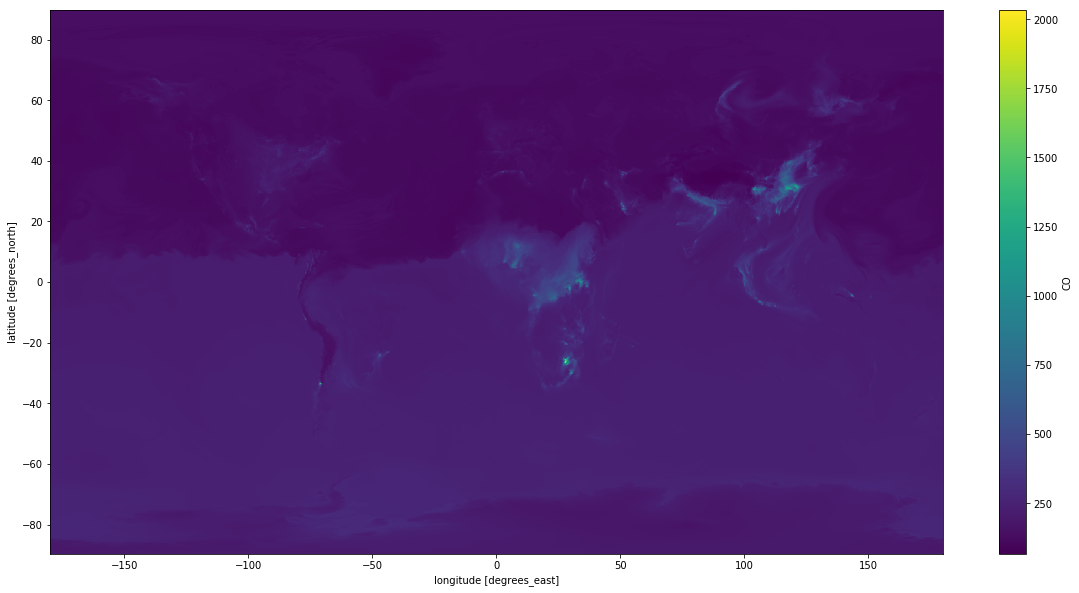

In [73]:
ds['CO'].mean(dim='time').plot(figsize=(20,10))

Plot histogram:

Text(0.5,1,'Histogram')

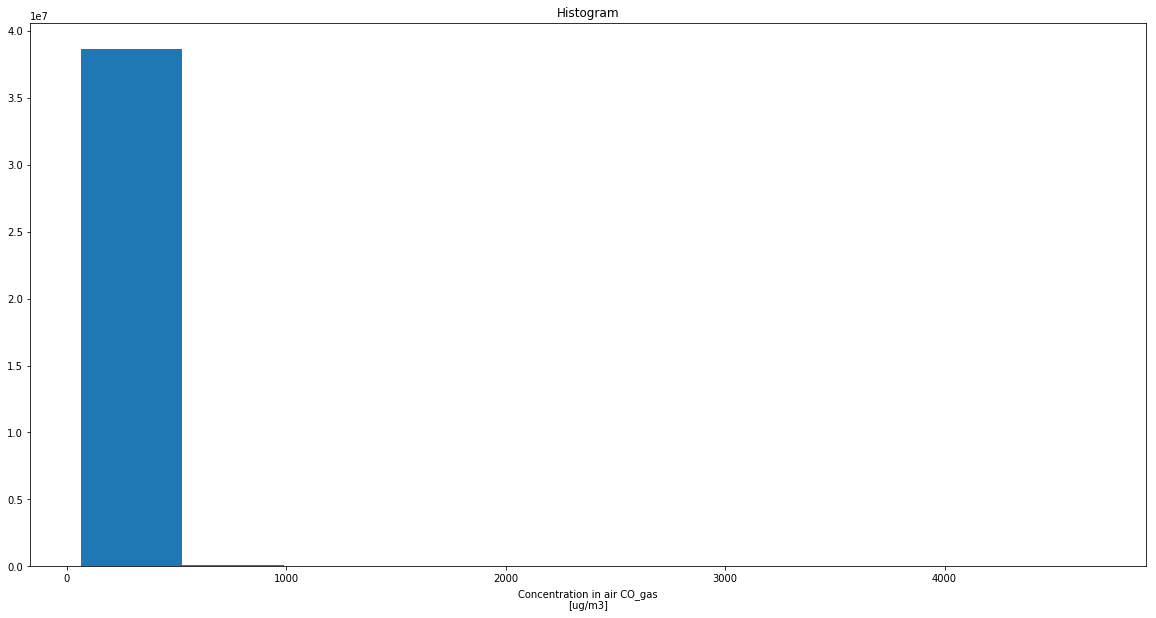

In [74]:
ds['CO'].plot(figsize=(20,10))
plt.title('Histogram')